# CHATBOT - NLP, Hyperopt and Tensorflow

# **Header Documentation**

## Scenario

Customers today expect more than a one-sided transaction. They want to interact and connect with their brands. Enterprises that are doing this effectively are already discovering the merits of a personal, actionable conversation through higher profit margins and an increased rate of customer loyalty.

Chatbots can be used to manage situations where a corporation is currently paying a great deal of money to employees. This is a controversial topic, because a chatbot may easily replace the human, especially if the human is speaking from a script.

Like all successful automation efforts, chatbot services can not only reduce costs, but it reduces the pain of company to be responsive to the customer 24 X 7.  Bots are accessible 24 hours a day, 7 days a week, and can frequently answer client inquiries faster than human agents. Furthermore, appropriate automation of corporate communication increases productivity.

With the development of smartphones, the Internet market's focus has changed away from traditional web browsers toward mobile platforms and ecosystems. However, with major mobile platform companies like KakaoTalk in Korea, Tencent in China, Line in Japan, and Whatsapp in the United States establishing messaging apps as long-term growth engines, chatbot-based messaging apps are expected to become a strong alternative to the current web browser's role in the future. Users can communicate via voice or text with a chatbot. Although artificial intelligence technology that enables perfect conversation has yet to be sufficiently developed. Currently, there is a combination of public expectations, corporations who do not understand the technological status of chatbots, and exaggerated marketing of chatbot-related firms.

## Problem Statement

An artificial intelligence chatbot is a system that uses natural language to communicate with humans and robots. The rapid development of Internet of Things (IoT) and artificial intelligence (AI) has boosted new technology, and the way humans communicate. Human to human communication has always been the mainstream as humans have the unreplaceable advantage of understanding the mood, intents, and way of communicating with other humans. Although artificial intelligence has made huge improvements over the recent decades, chatbot is still at its preliminary stage. There are still many challenges for using chatbots to replace humans. For example, as a natural language, it is extremely difficult for machines to perceive, researchers have invented natural language processing (NLP) tool to understand it, and it seems to be working well to some extent. However, natural languages carry with them emotions, randomness, and ambiguity. These problems cause enormous challenge for chatbots to handle. 

Human beings are emotional, and their behaviors are deeply influenced by their emotions. People feel and behave differently under different circumstances. As a chatbot, it is near to impossible for them to detect the emotional change, and hence adjust accordingly.At the same time, natural language has the characteristic of being ambiguous, and it is important to understand meanings behind the words for good communication. Current natural language processing algorithms cannot detect the intents of humans, that is why they seem not to be responding well, even for chatbots created by Microsoft and other technology leaders. It is not possible for them to provide comparable solutions with current searching engines, for advertisement and campaigning purposes, this can be problematic as customers make choices based on comparisons. Linear search limits the functions of the chabots and hence the advertising ability for chatbots. 
This paper will be discussing this challenge to use chatbots for advertisements, and try to propose potential machine learning algorithms and mechanisms to improve the result of advertising for chatbots. Instead of losing potential customers by implementing "cold and slow" chatbots, applying an intelligent chatbot can boost conversion rate and improve advertisement effects.
 We observed that, in general, chatbots perform similar activities to a traditional search engine. Although the chatbot only provided one output instead of several outputs,  the essential process flow remains the same, with the fresh search being performed each time an input is submitted.

# **Strategy**

After preprocessing the data,We would be building and training a model . We'll utilise a very basic feed-forward neural network with two hidden layers for our objectives. Our network's purpose will be to look at a collection of words and assign them to a class (one of our tags from the JSON file).

We'll begin by establishing our model's architecture. Keep in mind we you can play with with some of the numbers to come up with a better model! Machine learning is mostly based on trial and error.


We have two strategies in mind to train our model:
First one is to use HyperOpt and Second one is to use tflearn


# **HyperOpt**


James Bergstra created HyperOpt, an open-source Python module for Bayesian optimization.

It's made for large-scale optimization of models with hundreds of parameters, and it lets one scale the optimization across numerous cores and machines.

The library was specifically designed to improve machine learning workflows, including data preparation, model selection, and hyperparameter optimization.

HyperOpt-Sklearn wraps the HyperOpt library and allows for the automatic search of data preparation methods, machine learning algorithms, and model hyperparameters for classification and regression tasks.

# **Limitation of HyperOpt**

For HyperOpt,It is not possible to go beyond the initial number of experiments or to use any knowledge from past experiments. Furthermore, one cannot pause, save, and later load and resume, despite the fact that this is a feature of the implementation rather than the underlying method.

# **Tflearn**

TFLearn is a TensorFlow component that is modular and transparent when it comes to deep learning. TFLearn's major goal is to provide a higher-level TensorFlow API for facilitating and displaying new experiments. TFLearn is simple to use and comprehend.

In this chatbot,we used Natural Language ToolKit and TFLearn to respond to messages. 

# **Intended Audience**

It is made for organisational customers.This chatbot would answer the queries of users,clients on behalf of the company.

Queries like forgot password ,Financial Problems , Dispatch Information , Location Info ,etc would be answered.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


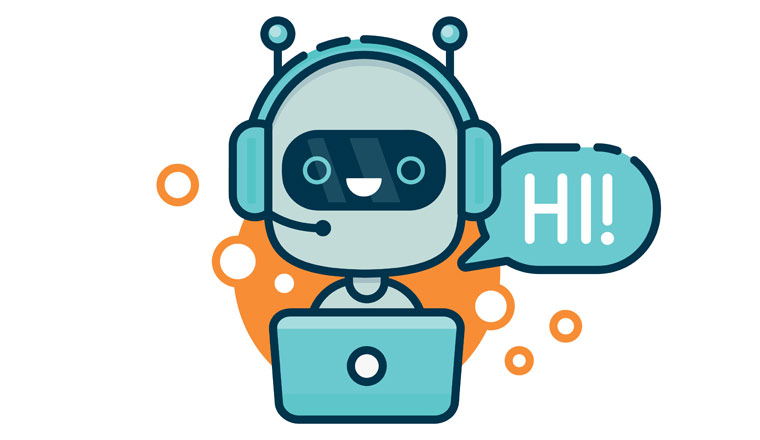

Libraries

In [ ]:
!pip install tflearn
!pip install nltk

     |████████████████████████████████| 107 kB 5.4 MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127299 sha256=db846541fcdca2ebc8c3d1e21ae09a0b127991f9cbb92cd4c981f3d54506941e
  Stored in directory: /root/.cache/pip/wheels/5f/14/2e/1d8e28cc47a5a931a2fb82438c9e37ef9246cc6a3774520271
Successfully built tflearn


#### Import Libraries

In [ ]:
import numpy as np
import tensorflow as tf
import tflearn
import random
import nltk
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()
import json
import pickle
import warnings
warnings.filterwarnings("ignore")

Instructions for updating:
non-resource variables are not supported in the long term


# **Data Information**

Here we are using Json data from intent file.Well,the data has been fetched from google drive.
Now coming to data ,it contains patterns of queries which the bot can face.And on seeing the to some extent similar queries, our bot would respond and the data for response is also mentioned in the Json File.


Hence more the data ,better the bot would be mantra for the successfull chatting of bot.

Data Looks like this :

        {"tag": "greeting",
         "patterns": ["Hi there", "How are you", "Is anyone there?","Hey","Hola", "Hello", "Good day"],
         "responses": ["Hello, thanks for asking", "Good to see you again", "Hi there, how can I help?"],
         "context": [""]
        },

# **Data Cleaning**

The process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database is known as data cleaning or cleansing. It entails identifying incomplete, incorrect, inaccurate, or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.As of now, we are not cleaning the data to wide extent as our data is already clean but the data can be cleaned by varied methods like unique(), missna(),etc.

However,we would be removing the duplicate data and converting it to lowercase.

In [5]:
print("Loading the intents.jason")
with open('/content/drive/MyDrive/intents (2).json') as json_data:
    intents = json.load(json_data)

Loading the intents.jason


In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# **Natural Language Processing**

Natural Language Processing (NLP) is a combination of two
processes, Natural Language Understanding (NLU) and
Natural Language Generation. NLP is a superset of NLU &
NLG.
NLU understands the meaning of the user’s input. Primarily
focused on machine reading comprehension, NLU gets the
chat-bot to comprehend what a body of text means. NLU is
basically an understanding of the text input given and
classifying it into proper intents.
NLU involves:
i) Natural Language Inference (NLI) and paraphrasing
ii) Dialogue agent
iii) Semantic parsing
iv) Question answering
v) Sentiment analysis
vi) Summarization of users’ input

In [7]:
words = []
classes = []
documents = []
ignore_words = ['?']
print("Creating a Loop for intents to Convert them to words, classes, documents and ignore_words")
for intent in intents['intents']:
    for pattern in intent['patterns']:        
        w = nltk.word_tokenize(pattern)
        words.extend(w)        
        documents.append((w, intent['tag']))
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

Creating a Loop for intents to Convert them to words, classes, documents and ignore_words


In [8]:
print("Stemming, Convert to Lowercase and Removing Duplicates")
words = [stemmer.stem(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

classes = sorted(list(set(classes)))

print (len(documents), "documents")
print (len(classes), "classes", classes)
print (len(words), "unique stemmed words", words)

Stemming, Convert to Lowercase and Removing Duplicates
136 documents
47 classes ['HR_related_problem', 'Location', 'Weather', 'about', 'appointment status', 'cabin', 'check_leave', 'commission', 'competitors_in_market', 'configuration', 'connect_people', 'cost_lowering', 'customer_satisfaction', 'domain', 'email_id', 'factors_impacting_sale', 'forgot_password', 'gadgets', 'goodbye', 'greeting', 'highest_grossing', 'hours', 'invalid', 'key_customers', 'leave', 'maintainence', 'manufacturing_problems', 'mopeds', 'name', 'noans', 'opentoday', 'options', 'order_details', 'order_tracking', 'payments', 'predict_delay', 'predict_performance', 'project_handling_queries', 'rental', 'search_department', 'search_person_by_id', 'solve_problems', 'supplier_info', 'thanks', 'today', 'turnover', 'version_update']
237 unique stemmed words ["'d", "'s", ',', '.', '23a12', '@', 'a', 'aaa111', 'aba101', 'abc123', 'acb210', 'acceiv', 'accid', 'account', 'ai', 'am', 'an', 'analys', 'and', 'anyon', 'appoint'

In [9]:
print("Creating the Data")
training = []
output = []
print("Creating an Empty List for Output")
output_empty = [0] * len(classes)

print("Creating Traning Set and Bag of Words")
for doc in documents:    
    bag = [] 
    pattern_words = doc[0]    
    pattern_words = [stemmer.stem(word.lower()) for word in pattern_words] # Stemming each word
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])

Creating the Data
Creating an Empty List for Output
Creating Traning Set and Bag of Words


In [10]:
print("Shuffling and Converting to Numpy Array")
random.shuffle(training)
training = np.array(training)

print("Creating Train/Test Sets (Lists)")
train_x = list(training[:,0])
train_y = list(training[:,1])
print("Building Neural Network")
print("Reset the Graph")
tf.compat.v1.reset_default_graph()

Shuffling and Converting to Numpy Array
Creating Train/Test Sets (Lists)
Building Neural Network
Reset the Graph


### Install Linux Dependencies and Modules for hyperopt-sklearn

In [11]:
!sudo apt-get install build-essential swig
!pip install auto-sklearn==0.12.6
!pip install dask distributed --upgrade
!pip install numpy
!pip install matplotlib
!pip install hyperopt
!pip install hpsklearn
!pip install pipelineprofiler
!pip install -U scikit-learn
!pip install git+https://github.com/hyperopt/hyperopt-sklearn.git
!pip install git+https://github.com/jaberg/skdata.git

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 2s (698 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (Thi

     |████████████████████████████████| 154 kB 8.3 MB/s 
  Created wheel for hpsklearn: filename=hpsklearn-0.1.0-py3-none-any.whl size=23912 sha256=f5261bbd007a2e522fda1e6e9acdd385051d3dd6e3ce9e27955980671b25be1b
  Stored in directory: /root/.cache/pip/wheels/b2/22/23/9207fbe861f70774b563f909a415b228450bfcf863c64ac1e8
Successfully built hpsklearn
     |████████████████████████████████| 880 kB 5.4 MB/s 
     |████████████████████████████████| 23.2 MB 1.7 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
auto-sklearn 0.12.6 requires scikit-learn<0.25.0,>=0.24.0, but you have scikit-learn 1.0.1 which is incompatible.


  Cloning https://github.com/hyperopt/hyperopt-sklearn.git to /tmp/pip-req-build-cedem4gi
  Running command git clone -q https://github.com/hyperopt/hyperopt-sklearn.git /tmp/pip-req-build-cedem4gi
  Created wheel for hpsklearn: filename=hpsklearn-0.0.3-py3-none-any.whl size=27009 sha256=822940c7b5027a24d9c459e6079adf4b6a01b6cf03134705c6595fc055d45178
  Stored in directory: /tmp/pip-ephem-wheel-cache-dicmoboi/wheels/47/a5/46/9ca750026db9dfa5de4bf4836194554cb0e2e01a245588ea59
Successfully built hpsklearn
  Attempting uninstall: hpsklearn
    Found existing installation: hpsklearn 0.1.0
    Uninstalling hpsklearn-0.1.0:
      Successfully uninstalled hpsklearn-0.1.0
  Cloning https://github.com/jaberg/skdata.git to /tmp/pip-req-build-rjenyi5w
  Running command git clone -q https://github.com/jaberg/skdata.git /tmp/pip-req-build-rjenyi5w
  Created wheel for skdata: filename=skdata-0.0.4-py3-none-any.whl size=546319 sha256=238d1914dec1144ffc051dfa7ffd8998e65f57db26ac83ba7b9198f36a75dd36
  

#### **Load Modules for hyperopt**

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from hpsklearn import HyperoptEstimator, any_preprocessing, any_classifier, any_regressor # includes PreProcessor, Model
from hyperopt import tpe #Estimator/Optimizer
from sklearn.datasets import make_classification
from sklearn.metrics import mean_absolute_error

WARN: OMP_NUM_THREADS=None =>
... If you are using openblas if you are using openblas set OMP_NUM_THREADS=1 or risk subprocess calls hanging indefinitely


In [14]:
new_train_X = np.array(training[:,0])
new_train_y = np.array(training[:,1])

In [15]:
# Split the dataset to train and test sets
X = np.array(new_train_X)
y = np.array(new_train_y)

X, y = make_classification(n_features=20)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [16]:
print('X_train Shape')
print(X_train.shape)
print('y_train Shape')
print(y_train.shape)

X_train Shape
(67, 20)
y_train Shape
(67,)


# **Fitting the data into the model**

Any search algorithm available in hyperopt can be used to drive the estimator. It is also possible to supply one's  own or use a mix of algorithms. The number of points to evaluate before returning, as well as an optional timeout (in seconds) can be used with any search algorithm.

Here we are using Cla classifier

In [17]:
# 2.5 Define Model/Search
hpsk_model = HyperoptEstimator(classifier=any_classifier('cla'), preprocessing=any_preprocessing('pre'), algo=tpe.suggest, max_evals=50, trial_timeout=30)

In [18]:
hpsk_model.fit(X_train, y_train)

100%|██████████| 1/1 [00:00<00:00,  4.67it/s, best loss: 0.2142857142857143]


# **Accuracy of model**

In [19]:
accuracy = hpsk_model.score(X_test, y_test)
print('Accuracy: %.3f' % accuracy)

Accuracy: 0.970


## **Acurracy Visualisation**


The accuracy of the model is being shown 97%.

In [20]:
print(hpsk_model.best_model())

{'learner': SGDClassifier(alpha=0.0010150093036990246, eta0=3.288402050419846e-05,
              l1_ratio=0.0031914047138262847, loss='log', max_iter=19797079.0,
              n_jobs=1, penalty='elasticnet', power_t=0.20160475456641624,
              random_state=0, tol=0.0009235430610570946, verbose=False), 'preprocs': (), 'ex_preprocs': ()}


In [21]:
print("saving pkl")
pickle.dump( {'words':words, 'classes':classes, 'train_x':train_x, 'train_y':train_y}, open( "training_data", "wb" ) )

saving pkl


In [23]:
print("Load the pkl")
data = pickle.load( open( "training_data", "rb" ) )
words = data['words']
classes = data['classes']
train_x = data['train_x']
train_y = data['train_y']


with open('/content/drive/MyDrive/intents (2).json') as json_data:
    intents = json.load(json_data)

Load the pkl


### Define Functions for Chatbot

In [24]:
# Tokenizing/Breaking the constituents parts of Sentence.
def clean_up_sentence(sentence):    
    sentence_words = nltk.word_tokenize(sentence)
    sentence_words = [stemmer.stem(word.lower()) for word in sentence_words]
    return sentence_words

# Return the Array of Words: True/False and 0/1 for each word array that exists in the Sentence
def bow(sentence, words, show_details=False):
    sentence_words = clean_up_sentence(sentence)
    bag = [0]*len(words)
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s:
                bag[i] = 1
                if show_details:
                    print ("Exist in Bag: %s" % w)
    return(np.array(bag))

ERROR_THRESHOLD = 0.20
print("ERROR_THRESHOLD = 0.20")

def classify(sentence):
    results = hpsk_model.predict([bow(sentence, words)])[0]
    results = [[i,r] for i,r in enumerate(results) if r>ERROR_THRESHOLD]
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append((classes[r[0]], r[1]))
    return return_list
          
def response(sentence, userID='123', show_details=False):
    results = classify(sentence)
    if results:
        while results:
            for i in intents['intents']:
                if i['tag'] == results[0][0]:
                    return print(random.choice(i['responses']))

            results.pop(0)

ERROR_THRESHOLD = 0.20


 
# Here we are GETTING AN ERROR USING HyperOPT and hence we proceeded with tfLearn

#Please run tflearn code to get better idea of it.

In [32]:

 
while True:
  input_data = input("User- ")
  answer = response(input_data)
  if answer == False:
    break
  else:    
    answer

KeyboardInterrupt: ignored

###### As you can see, there is an limitation for the no of input features. We tried it several times but still the same error occurs. Refferred to many blogs and expert ideas but no any proper explanation is provided as far as this technology is new. Bay with new experiments, this could be solved in the future.
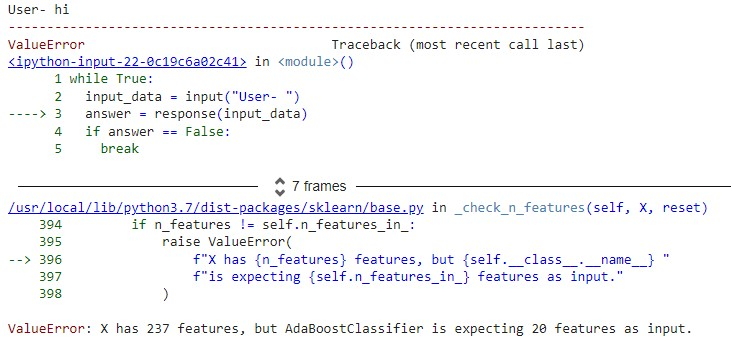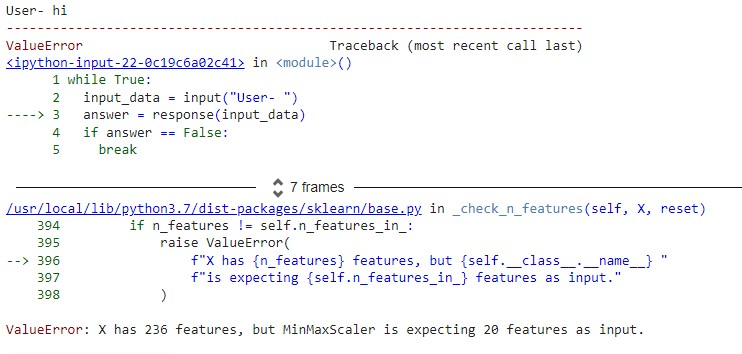 

# Beacuse of the above reason we continued with the tf learn

#### Train the Model by using tflearn

In [33]:
tf_model = tflearn.input_data(shape=[None, len(train_x[0])])
tf_model = tflearn.fully_connected(tf_model, 8)
tf_model = tflearn.fully_connected(tf_model, 16)
tf_model = tflearn.fully_connected(tf_model, len(train_y[0]), activation='softmax')
tf_model = tflearn.regression(tf_model)
print("Train the Model")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train the Model


In [34]:
model = tflearn.DNN(tf_model, tensorboard_dir='tflearn_logs')

In [35]:
print("Train the Model using 500 epochs & batch_size of 8")
model.fit(train_x, train_y, n_epoch=500, batch_size=8, show_metric=True)
print("Save the Model")
model.save('model.tflearn')


Training Step: 8499  | total loss: 0.02827 | time: 0.108s
| Adam | epoch: 500 | loss: 0.02827 - acc: 0.9798 -- iter: 128/136
Training Step: 8500  | total loss: 0.02568 | time: 0.113s
| Adam | epoch: 500 | loss: 0.02568 - acc: 0.9818 -- iter: 136/136
--
Save the Model
INFO:tensorflow:/content/model.tflearn is not in all_model_checkpoint_paths. Manually adding it.


In [ ]:
print("saving pkl")
pickle.dump( {'words':words, 'classes':classes, 'train_x':train_x, 'train_y':train_y}, open( "training_data", "wb" ) )

saving pkl


In [37]:
print("Load the pkl")
data = pickle.load( open( "training_data", "rb" ) )
words = data['words']
classes = data['classes']
train_x = data['train_x']
train_y = data['train_y']


with open('/content/drive/MyDrive/intents (2).json') as json_data:
    intents = json.load(json_data)
    
print("Load the Model")
model.load('./model.tflearn')

Load the pkl
Load the Model
INFO:tensorflow:Restoring parameters from /content/model.tflearn


### Functions for Chatbot (Modified for TFLearn)

In [38]:
# Tokenizing/Breaking the constituents parts of Sentence.
def clean_up_sentence(sentence):    
    sentence_words = nltk.word_tokenize(sentence)
    sentence_words = [stemmer.stem(word.lower()) for word in sentence_words]
    return sentence_words

# Return the Array of Words: True/False and 0/1 for each word array that exists in the Sentence
def bow(sentence, words, show_details=False):
    sentence_words = clean_up_sentence(sentence)
    bag = [0]*len(words)
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s:
                bag[i] = 1
                if show_details:
                    print ("Exist in Bag: %s" % w)
    return(np.array(bag))

ERROR_THRESHOLD = 0.20
print("ERROR_THRESHOLD = 0.20")

def classify(sentence):
    results = model.predict([bow(sentence, words)])[0]
    results = [[i,r] for i,r in enumerate(results) if r>ERROR_THRESHOLD]
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append((classes[r[0]], r[1]))
    return return_list

def response(sentence, userID='123', show_details=False):
    if sentence == 'Bye' or sentence == 'bye':
      return False
    else:
      results = classify(sentence)
      if results:
        while results:
            for i in intents['intents']:
                if i['tag'] == results[0][0]:
                    return print(random.choice(i['responses']))

            results.pop(0)

ERROR_THRESHOLD = 0.20


**### NOW it is working fine .Please enter query in the User Input Box.**

# **Result/Output Visualisation**

In [ ]:

print("Hi I'm Romeo. I'm here to help you with your needs. Ask me anything. If you want to exit simply say 'Bye'")
while True:
  input_data = input("User- ")
  answer = response(input_data)
  if answer == False:
    print('Thank you for reaching us. Have a nice day !!!')
    break
  else:    
    answer

Hi I'm Romeo. I'm here to help you with your needs. Ask me anything. If you want to exit simply say 'Bye'
User- login forgot
Please contact the project depatment
User- contact
please elaborate your question
User- love
Please ask organisation related query.
User- cheat
please elaborate your question
User- love
Please ask organisation related query.
User- house
please elaborate your question
User- kkk
Can't Understand Your Question
User- j,bjk jb,
Can't Understand Your Question
User- jjk
Can't Understand Your Question


# **Peer Review**

We got our model peer reviewed and they reviewed it as good going project.It is working fine just like Alexa to some extent.Please type any input in the bot and bot would respond to it.

# **Expectations vs Reality**


We thought to proceed with HyperOpt as the professor suggested us but that model didnot give us an appropriate output.

As,For HyperOpt,It is not possible to go beyond the initial number of experiments or to use any knowledge from past experiments. Furthermore, one cannot pause, save, and later load and resume, despite the fact that this is a feature of the implementation rather than the underlying method.

So we proceeded with tflearn. TFLearn's major goal is to provide a higher-level TensorFlow API for facilitating and displaying new experiments. TFLearn is simple to use and comprehend.

In this chatbot,we used Natural Language ToolKit and TFLearn to respond to messages. 


Second was to feed the huge data but as of now ,the project is on small scale and answer the limited queries.Had the dedicated time available to us,we would have done web scrapping and autoMl training to larger extent.But it is a small effort to create the basic chatbot for the organisation to handle usual queries.



# **Trailer Documentation**

We took reference of Rasa Bot to create our bot.
https://rasa.com/docs/
As the Rasa tagline goes,
"Build great conversational AI in-house
 Open source machine learning tools for developers and product teams to expand bots
 beyond answering simple questions."

 So we proceeded with same mantra.
 Rasa does this in a very innovative way. The Rasa stack consists of two major components :

1) Rasa NLU is responsible for the Natural Language Understanding of the chatbot. Its main purpose is, given an input sentence, predict the intent of that sentence and extract useful entities from it.

2)The second component, Rasa Core, is the next component in the Rasa stack. It takes structured input in the form of intents and entities which need not be from Rasa NLU, and chooses which action the bot should take using a probabilistic model (LSTM).

Though our bot is not using the Rasa environment but still we got the basic idea like the developers implemented it.

1) Nithyanandam, S. D., Kasinathan, S., Radhakrishnan, D., &amp; Jebapandian, J. (2021). NLP for Chatbot Application. Advances in Computational Intelligence and Robotics, 142–168. https://doi.org/10.4018/978-1-7998-7728-8.ch008 


2) Shah, J., &amp; Mohammed, S. (2020). Chatbot analytics based on question answering system movie related chatbot case Analytics.pdf. https://doi.org/10.36227/techrxiv.12061095.v1 


# **Conclusion**

In this project , we have discussed what we mean by a chat-bot.
We also saw the evolution and different levels of chat-bots. We also
took a look at Natural Language Processing (NLP). We
understood the process of Natural Language Understanding
(NLU) and Natural Language Generation (NLG).We took reference of RASA framework to build our chatbot. Afterwards we used tflearn model over hyperOpt to make the organisational chatbot.

## References

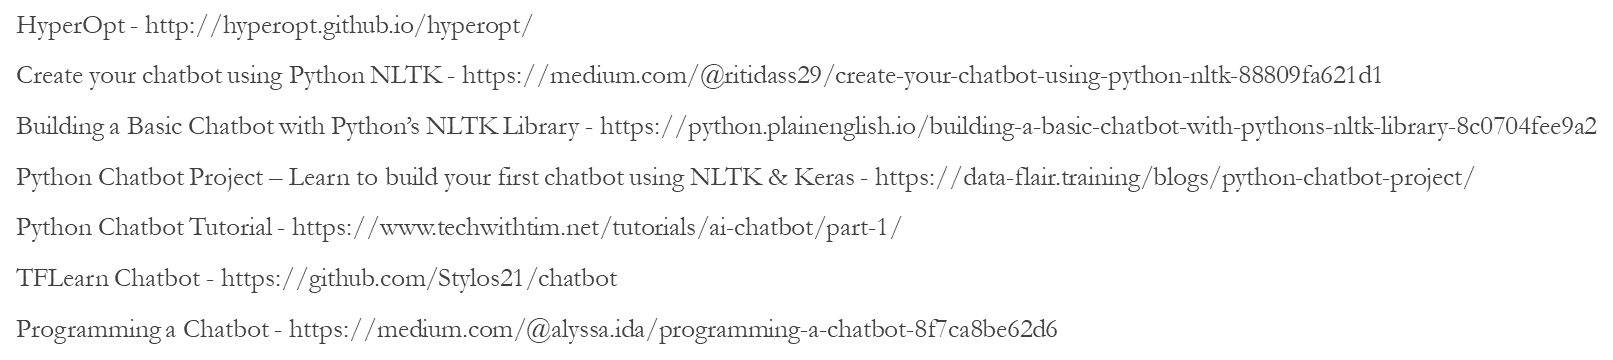

Nithyanandam, S. D., Kasinathan, S., Radhakrishnan, D., &amp; Jebapandian, J. (2021). NLP for Chatbot Application. Advances in Computational Intelligence and Robotics, 142–168. https://doi.org/10.4018/978-1-7998-7728-8.ch008 


Shah, J., &amp; Mohammed, S. (2020). Chatbot analytics based on question answering system movie related chatbot case Analytics.pdf. https://doi.org/10.36227/techrxiv.12061095.v1 


# **Source Code**

https://github.com/KangNavneet/OrganisationChatbot


Looking Forward to explore more aspects of the chatbot.The whole group has provided lot of support in learning new things on the way.
Thanks to the team and the professor.
